# Esercizio 6.1

L'esercizio richiede di simulare il modello di Ising in una dimensione e confrontare i risultati così ottenuti con le soluzioni esatte analitiche. Il modello di Ising ci fornisce una descrizione del magnetismo nella materia e considera variabili discrete che possono assumere valori +1 e -1, gli spin; l'Hamiltoniana del sistema è la seguente:
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $J=1$ è il termine di interazione.
 L'obbiettivo dell'esercizio è quindi, avendo 50 particelle, eseguire una simulazione per ottenere l'energia interna $U(N,T)$, la magnetizzazione $M(N,T,h=0.02)$, la suscettibilità $\chi(N,T)$ e la capacità termica $C(N,T)$, dove N sono il numero di particelle, T la temperatura e h il campo magnetico (preso uguale a 0 tranne che per la simulazione della magnetizzazione). La temperatura è stata fatta variare gradualmente da 2 K a 0.5 K e i risultati sono riportati nei grafici.
La simulazione è stata condotta per 20 blocchi composti da 10000 step e la temperatura è stata fatta variare di 0.05 K.
Sono state eseguite due simulazioni utilizzando l'algoritmo di Metropolis e di Gibbs, e i risultati confrontati con i valori analiticamente calcolati.



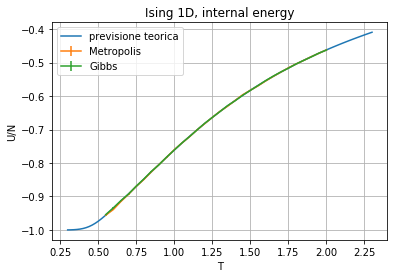

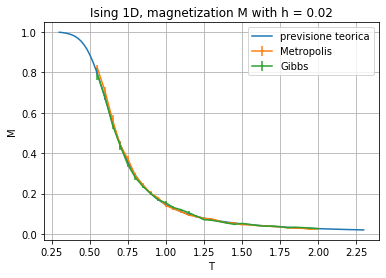

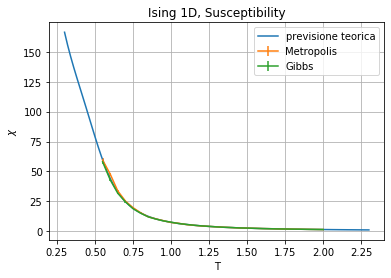

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

#METRO
Energy=np.loadtxt("Moutput.ene.0")
Capacity=np.loadtxt("Moutput.capacity.0")
Magnetization=np.loadtxt("Moutput.magnetization.0")
Chi=np.loadtxt("Moutput.chi.0")
#GIBBS
GEnergy=np.loadtxt("Goutput.ene.0")
GCapacity=np.loadtxt("Goutput.capacity.0")
GMagnetization=np.loadtxt("Goutput.magnetization.0")
GChi=np.loadtxt("Goutput.chi.0")


x=-np.arange(30)/20+2.0

#ENERGIA
points=100
T = np.linspace(0.3,2.3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
E = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T,E,label="previsione teorica")       
plt.errorbar(x,Energy[:,2],Energy[:,3],label="Metropolis")
plt.errorbar(x,GEnergy[:,2],GEnergy[:,3],label="Gibbs")
plt.xlabel("T")
plt.ylabel("U/N")
plt.title("Ising 1D, internal energy")
plt.legend()
plt.grid(True)
plt.show()


##CAPACITA'
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T,heat,label="previsione teorica")
plt.errorbar(x,Capacity[:,2],Capacity[:,3],label="Metropolis")
plt.errorbar(x,GCapacity[:,2],GCapacity[:,3],label="Gibbs")
plt.xlabel("T")
plt.ylabel("C")
plt.title("Ising 1D, Heat Capacity")
plt.legend()
plt.grid(True)
plt.show()


##MAGNETIZZAZIONE
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T,M,label="previsione teorica")
plt.errorbar(x,Magnetization[:,2],Magnetization[:,3],label="Metropolis")
plt.errorbar(x,GMagnetization[:,2],GMagnetization[:,3],label="Gibbs")
plt.xlabel("T")
plt.ylabel("M")
plt.title("Ising 1D, magnetization M with h = 0.02")
plt.legend()
plt.grid(True)
plt.show()


#SUSCETTIBILITA'
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X,label="previsione teorica")
plt.errorbar(x,Chi[:,2],Chi[:,3],label="Metropolis")
plt.errorbar(x,GChi[:,2],GChi[:,3],label="Gibbs")
plt.xlabel("T")
plt.ylabel("$\chi$")
plt.title("Ising 1D, Susceptibility")
plt.legend()
plt.grid(True)
plt.show()






Dai grafici ottenuti si nota come entrambi gli algoritmi diano dei risultati in linea con i risultati analitici.
Le formule utilizzate per ottenere le grandezze sono le seguenti:

- $U(N,T) = \langle H \rangle_{h=0}$ energia interna del sistema
- $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ capacità termica del sistema
- $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$ suscettività magnetica
- $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$ magnetizzazione
